In [21]:
import gdax
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

from datetime import datetime, timedelta
from math import ceil
from time import sleep

from backtest import Trader, historic_prices
from algorithms import SMA, EMA, PPOAlgo, StochasticOscillator, MovingAverageAlgo, PriceWatchOscillator

%matplotlib inline
client = gdax.PublicClient()

In [22]:
def historic_prices(client, product, num_candles, granularity, max_per=200):
    start = datetime.utcnow().replace(microsecond=0)
    delta = timedelta(seconds=granularity) * max_per
    full = ceil(num_candles / max_per)
    rates = []
    pairs = []
    for i in range(1, full + 1):
        frm = start - (delta * i)
        to  = frm + delta
        print('From: {}, To: {}'.format(frm.isoformat(), to.isoformat()))
        rates.extend(client.get_product_historic_rates(product, start=frm.isoformat(), end=to.isoformat(), granularity=granularity))
        sleep(0.33)
    for rate in rates:
        pairs.append((rate[0], rate[4]))
    pairs = list(OrderedDict.fromkeys(pairs))
    prices = [x[1] for x in pairs]
    while 'a' in prices: prices.remove('a')
    prices.reverse()
    print('Last 10 prices: {}'.format(prices[-10:]))
    return prices

From: 2018-02-19T22:20:13, To: 2018-02-20T15:00:13
From: 2018-02-19T05:40:13, To: 2018-02-19T22:20:13
From: 2018-02-18T13:00:13, To: 2018-02-19T05:40:13
Last 10 prices: [9397.38, 9390, 9379.75, 9413, 9401.92, 9401.49, 9412.51, 9385.01, 9385.01, 9385.01]
603 prices


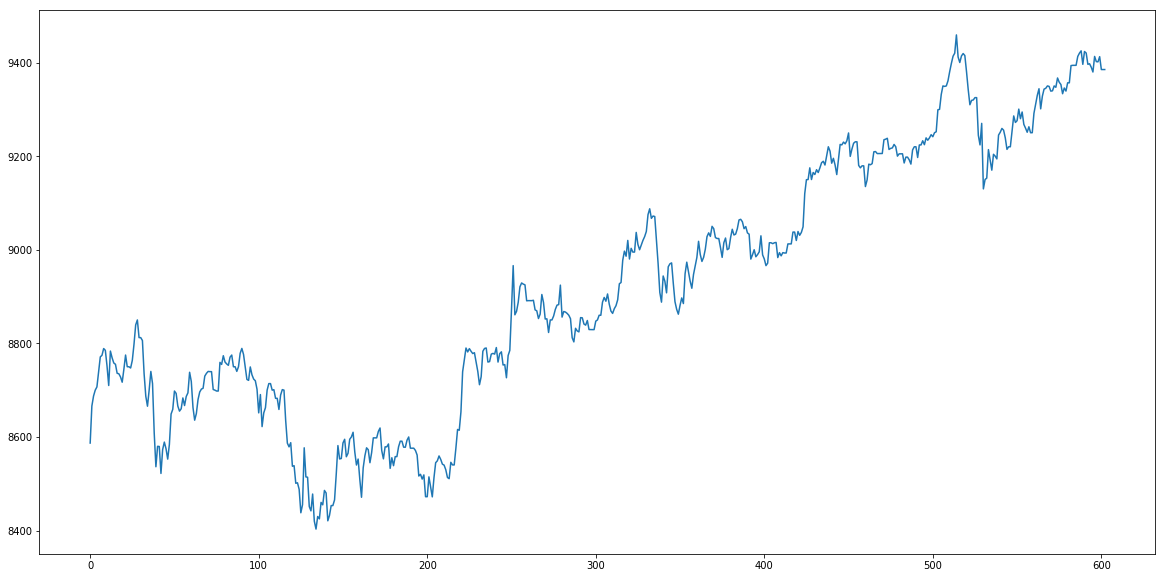

In [25]:
prices = historic_prices(client=client, product='BTC-EUR', num_candles=500, granularity=300)
ticks = len(prices)
print('{} prices'.format(ticks))

pd.Series(prices).plot(figsize=(20,10))